In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from time import time

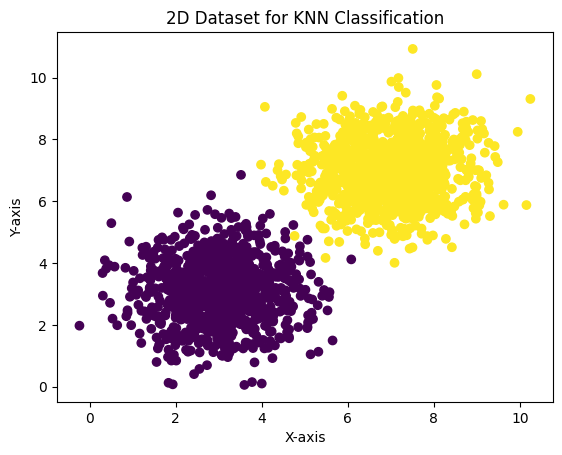

In [147]:
# Set a random seed for reproducibility
np.random.seed(42)

# Class 1
class1_points = np.random.normal(loc=[3, 3], scale=[1, 1], size=(1000, 2))

# Class 2
class2_points = np.random.normal(loc=[7, 7], scale=[1, 1], size=(1000, 2))

# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])

# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([0] * 1000 + [1] * 1000)

# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.title('2D Dataset for KNN Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [148]:
data = np.concatenate((all_points,np.atleast_2d(labels).reshape(-1,1)), axis=1)
data = pd.DataFrame(data, columns=["X1", "X2", "label"])

In [149]:
X_train, X_test, y_train, y_test = train_test_split(all_points, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1800, 2), (200, 2), (1800,), (200,))

In [150]:
pd.DataFrame(np.concatenate((X_train, np.atleast_2d(y_train).reshape(-1,1)), axis=1))

,0,1,2
0,6.004852,6.818497,1.0
1,3.494030,3.260674,0.0
2,1.551916,1.592536,0.0
3,3.662881,4.173474,0.0
4,2.579813,2.718215,0.0
...,...,...,...
1795,7.436739,7.404295,1.0
1796,6.199961,6.936475,1.0
1797,3.513106,2.740453,0.0
1798,7.098068,8.295872,1.0


C:\Users\84866\AppData\Local\Temp\ipykernel_12912\2975642372.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis', c = 'r', label='train')
C:\Users\84866\AppData\Local\Temp\ipykernel_12912\2975642372.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], cmap='viridis', c = 'b', label='test')


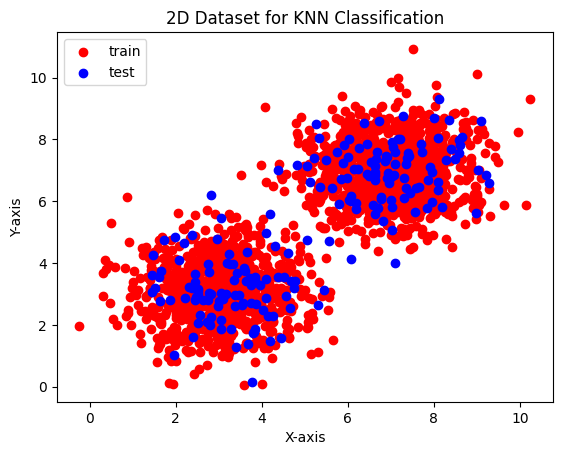

In [151]:
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='viridis', c = 'r', label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], cmap='viridis', c = 'b', label='test')
plt.legend()
plt.title('2D Dataset for KNN Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

$$
Euclidean \ distance: l_1 = ||Z - X||_2^2 = (Z - X)^T(Z - X) = ||Z||_2^2 + ||X||_2^2 - 2X^TZ
$$

In [152]:
class KNN:
    def __init__(self,k = 10) -> None:
        self.k = k
    def fit(self,X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def distance_ps_fast(self, Z, X):
        X2 = np.sum(X*X, keepdims=True)
        Z2 = np.sum(Z*Z, keepdims=True)
        return Z2 + X2.T - 2*Z.dot(X.T) 
    def predict(self, X_test):
        dist_mat = pairwise_distances(X_test, self.X_train)
        k_close = []
        for i in dist_mat:
            idx = np.argsort(i)[:self.k]
            k_close.append(idx)
        label_mat = np.zeros((X_test.shape[0], self.k))
        for i, val1 in enumerate(k_close):
            for k, val2 in enumerate(val1):
                label_mat[i, k] = self.y_train[val2]
        label_mat = label_mat.astype(dtype='int')
        res = []
        for row in label_mat:     
            most_frequent_value = np.bincount(row).argmax()
            res.append(most_frequent_value)
        return res

In [153]:
model = KNN(k = 1)
model.fit(X_train, y_train)
res = model.predict(X_test)

In [154]:
accuracy_score(res, y_test)

0.995